# 04 분류
### Context
#### Classification
+ Logistic Regression
+ SVM
+ Decision Tree
+ Random Forest

#### Evaluation
+ Accuracy
+ Confusion Matrix
+ ROC-AUC 

In [1]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

In [2]:
#아이리스가 쉽고 잘됨 3개종 예측 4개변수로 구성되있고 쉬움
from sklearn.datasets import load_iris
iris = load_iris()

이번 회귀 실습을 위해 sklearn 내장 데이터인 붓꽃 주택 데이터를 불러오겠습니다.<br>
붓꽃 데이터셋은 꽃 받침의 길이, 너비, 꽃잎의 길이, 너비인 4개의 변수를 가지고 있으며, 3개의 붓꽃 종을 라벨 데이터로 가지고 있습니다.

In [ ]:
print(iris.DESCR)

In [4]:
data = iris.data
label = iris.target
columns =  iris.feature_names

In [5]:
data =  pd.DataFrame(data,columns=columns)
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
data.shape

In [ ]:
data.describe()

In [ ]:
data.info()

## Classification
머신러닝과 통계학에서의 분류는 새로 관측된 데이터가 어떤 범주 집합에 속하는지를 식별하는 것을 말합니다. <br>
훈련 데이터를 이용해 모델을 학습하면, 모델은 결정 경계(Decision boundary)라는 데이터를 분류하는 선을 만들어 냅니다.<br>
이번 수업에서는 여러가지 대표적인 모델의 원리를 간단히 알아보고, 결정 경계를 만들어 데이터를 분류해보겠습니다.<br>

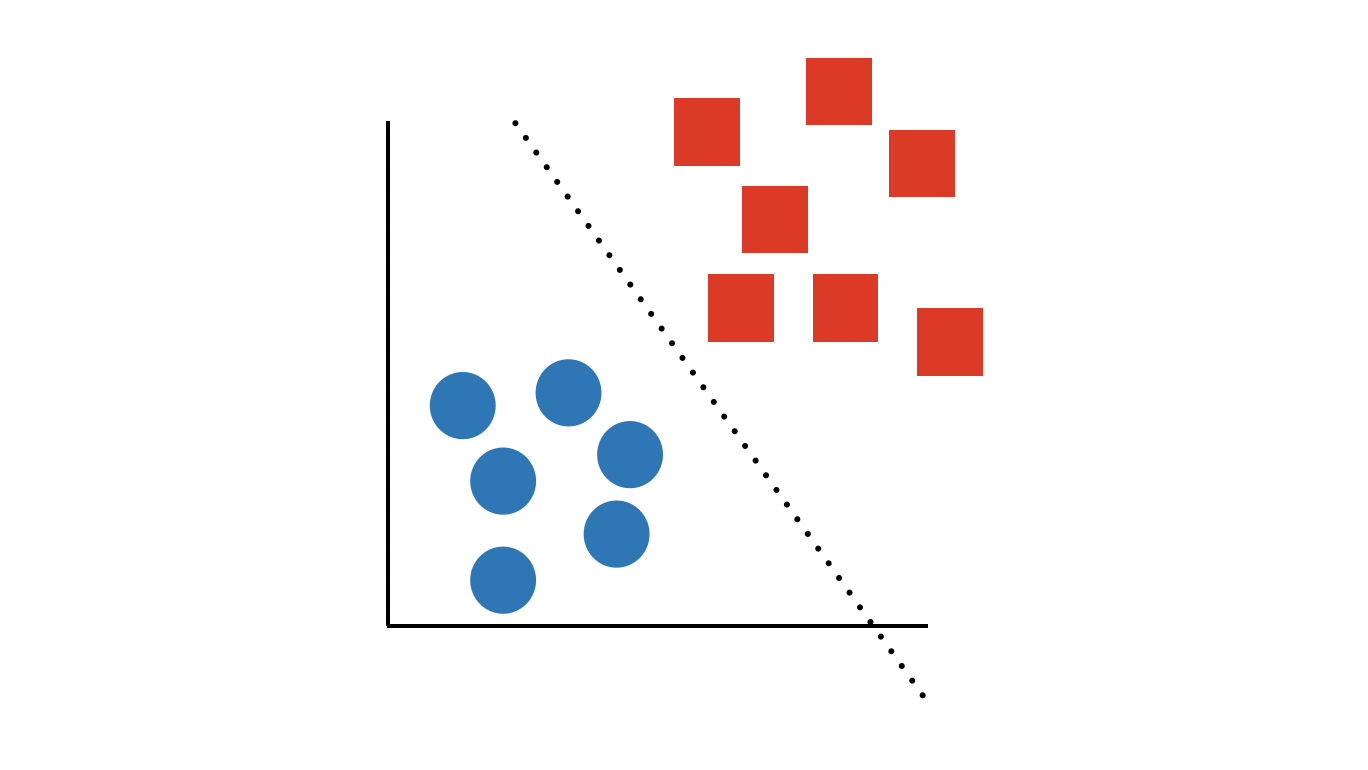 


### 1. Logistic Regression
Regression 이라는 말에서 알 수 있듯이, 로지스틱 회귀 모델은 선형 회귀 모델에서 변형된 모델입니다. <br>
Odds라는 어떤 일이 발생할 상대적인 비율 개념을 사용해 선형 회귀식을 변형합니다.

$$ Odds = {p \over {1-p}} $$
$$ p : 어떤\ 일이\ 발생할\ 확률 $$

Odds를 그대로 사용하지말고 log를 취해 사용하면 0을 기준으로 상호 대칭적이며, 계산을 수월하게 할 수 있도록 변경해줍니다.<br>
기존의 선형 회귀식에서 y 위치에 log Odds를 적용하면 다음과 같은 식이 됩니다.<br>

$$ ln({Y \over {1-Y}}) = wx + b $$

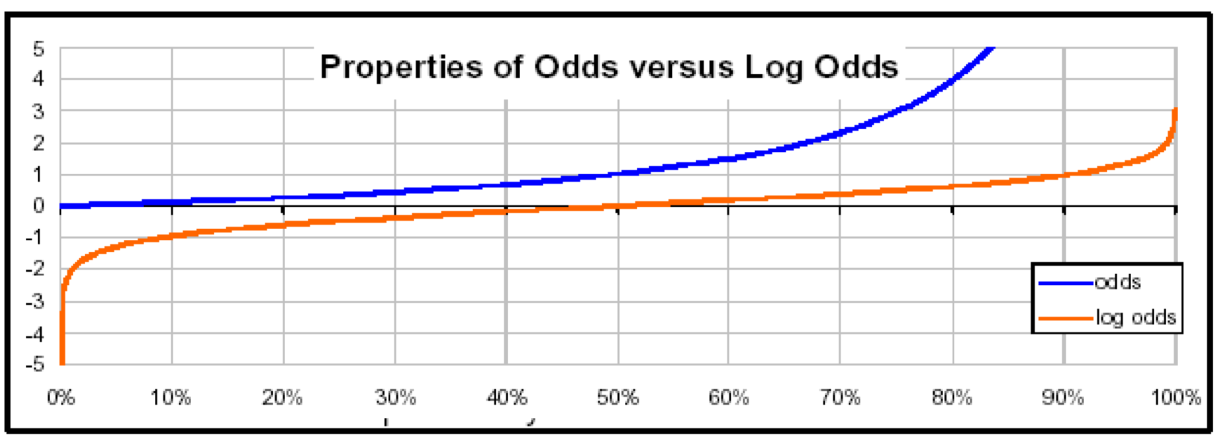


이를 y에 대해 정리하면 그 유명한 sigmoid 식이 됩니다.

$$ y = {1 \over {1+\exp^{-(wx + b)}}} $$


Linear Regression은 잔차의 제곱을 최소화 하는 방식으로 학습을 했었습니다.<br>
Logistic Regression은 Maximum Likelihood Estimation(MLE)이라는 과정을 통해 모델을 학습하는데, 자세한 내용은 참조 목록에 있는 페이지를 확인해주시면 감사하겠습니다.<br>

### 로지스틱 회귀은 이진 분류 모델로 알고 있는데, 어떻게 여러개의 클래스를 분류할 수 있나요?
하나의 수식이 출력하는 결과는 클래스의 확률을 나타내는 것은 맞습니다. 하지만, 멀티 클래스인 경우 내부적으로 클래스 수에 맞게 여러개의 수식을 만들어 각각의 클래스에 속할 확률을 계산한 후 가장 높은 확률은 가진 클래스로 분류합니다. 이를 One-vs-Rest라고 합니다. 자세한 내용은 참조 목록에 있는 페이지를 확인해주시면 감사하겠습니다.

Logistic Regression은 Sklearn의 linear_model 패키지에 있습니다.

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,label,test_size=0.2,shuffle=True,stratify=label,random_state=2022)

#### 1) 모델 불러오기 및 정의하기

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#### 2) 모델 학습하기 (훈련 데이터)

In [8]:
lr.fit(X_train,y_train)

LogisticRegression()

#### 3) 결과 예측하기 (테스트 데이터)

In [9]:
y_pred = lr.predict(X_test)

In [11]:
lr.predict(X_test)

array([2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1,
       2, 0, 1, 0, 1, 1, 0, 2])

In [ ]:
lr.predict_proba(X_test) * 100

#### 4) 결과 살펴보기
일반적으로 분류에서는 Accuracy, 정확도를 평가 척도로 사용합니다.<br>

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
print('로지스틱 회귀, 정확도 : {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

로지스틱 회귀, 정확도 : 93.33%


#### 로지스틱 회귀 모델의 계수 w, 절편 b 살펴보기
어떤 변수에 얼마 만큼의 가중치가 할당되고, 절편 값은 얼마나 할당되는지 살펴볼 수 있습니다.<br>
3개의 멀티 클래스 분류이므로 One-vs-Rest, 3개의 회귀식을 가지고 있습니다.

In [15]:
print('로지스틱 회귀, 계수(w) : {}, 절편(b) : {}'.format(lr.coef_,lr.intercept_))

로지스틱 회귀, 계수(w) : [[-0.40844631  0.94510926 -2.39879214 -1.01836799]
 [ 0.48417854 -0.35734363 -0.25551566 -0.73792973]
 [-0.07573223 -0.58776563  2.6543078   1.75629772]], 절편(b) : [  9.24020944   2.43242577 -11.67263521]


### 2. Support Vector Machine
Support Vector Machine(SVM, 서포트 벡터 머신)는 주어진 데이터를 바탕으로하여 두 카테고리(이진 분류의 경우) 사이의 간격(Margin, 마진)을 최대화하는 데이터 포인트(Support Vector, 서포트 벡터)를 찾아내고, <br>
그 서포트 벡터에 수직인 경계를 통해 데이터를 분류하는 알고리즘입니다.<br><br>
 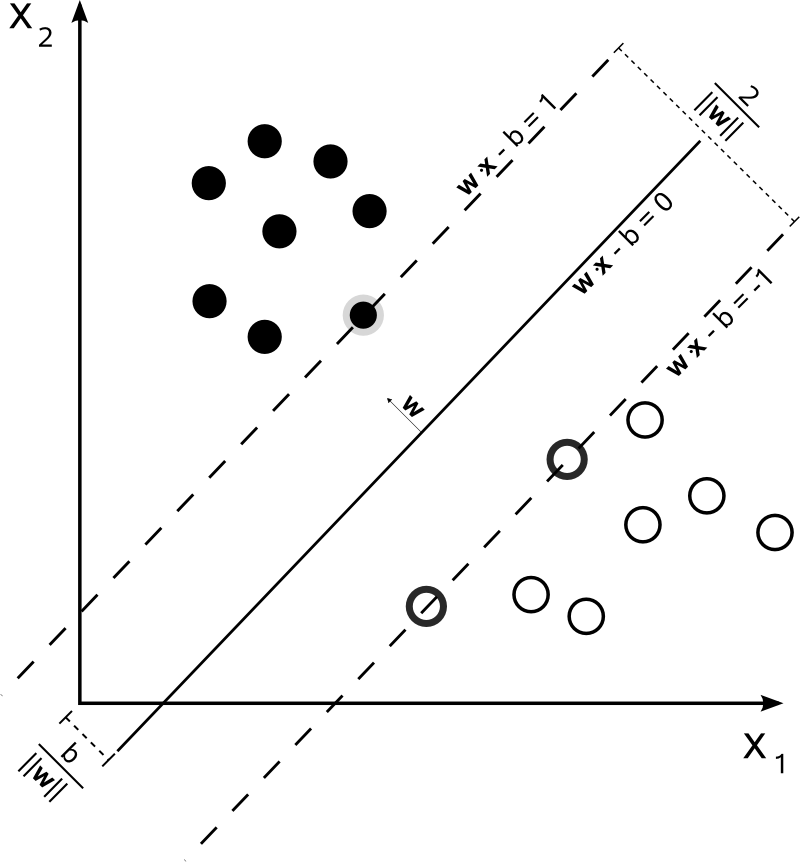

### 왜 마진을 최대화 할까요?
서포트 벡터 머신에서 나오는 마진은 물건을 판매할때 마진이 20%다 라고 말하는 그 마진이 맞습니다. <br>
그렇다면 경계면과의 마진을 최대화 하는 것이 왜 분류를 잘하게 할까요? 

#### 경험적 위험 최소화(Empirical Risk Minimization, ERM) vs 구조적 위험 최소화(Structural Risk Minimization,SRM)
* 경험적 위험 최소화 : 데이터를 보면서 데이터의 에러를 줄이는 방향
    * 훈련 데이터에 대해 위험을 최소화
    * 학습 알고리즘의 목표
    * 뉴럴 네트워크, 결정 트리, 선형 회귀, 로지스틱 회귀 등.
* 구조적 위험 최소화 : 데이터를 모두고려해서 마진을 최대화 하는 방향으로 
    * 관찰하지 않은(Unseen) 데이터에 대해서도 위험을 최소화
    * 오차 최소화를 일반화 시키는 것
    

<div align='center'> 
    <font size="6">어떤 모델이 더 좋을까요?</font> 
</div>


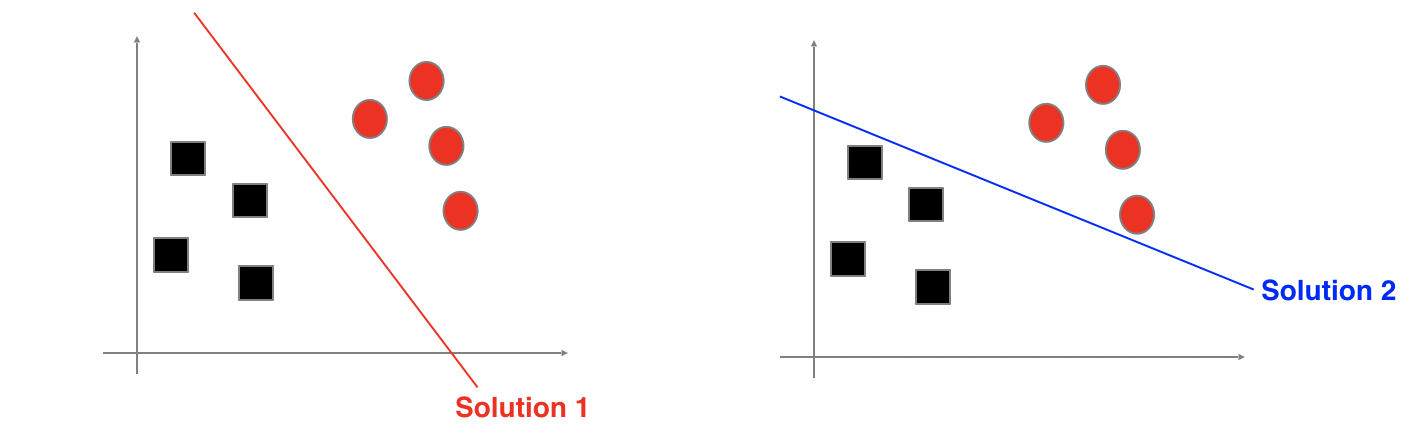


### Cost : Soft or Hard
SVM에는 Soft Margin, Hard Margin 이라는 말이 있습니다. 단어 자체에서도 유추할 수 있으시겠지만, Soft Margin은 유연한 경계면을 만들어내고 Hard Margin은 분명하게 나누는 경계면을 만들어냅니다. 그렇다면 왜 Soft Margin이 필요한걸까요?

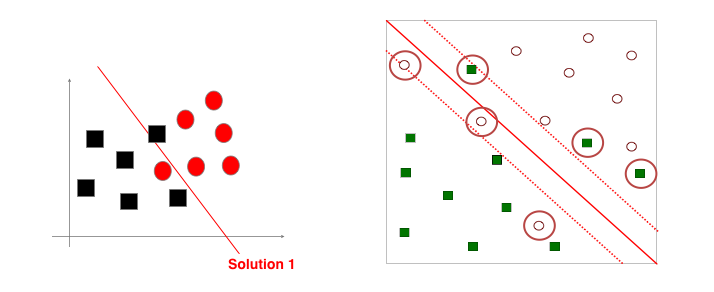 

다음과 같은 데이터 분포는 직선으로 두개의 데이터를 나누는 경계면을 만들기 어렵습니다. 현실에서도 우리가 최적의 답을 찾지 못할때 어느정도 비용(Cost, C)을 감수하면서 적절한 답을 찾는 것을 떠올려보세요.<br>
Soft Margin은 그런 원리입니다. 경계면을 조금씩 넘어가는 데이터들(비용, Cost)을 감수하면서 가장 차선의 경계면을 찾습니다.<br>
실제 알고리즘에서도 C(Cost)값을 통해 얼마나 비용을 감수할 것인지를 결정할 수 있습니다. 
# 크면 클수록 Hard Margin을, 작으면 작을수록 Soft Margin을 만들어냅니다. <br>


# 저차원을 고차원으로 Kernel Trick
SVM은 기본적으로 선형 분류를 위한 경계면을 만들어냅니다. 그렇다면 어떻게 비선형 분류를 할 수 있을까요?<br>

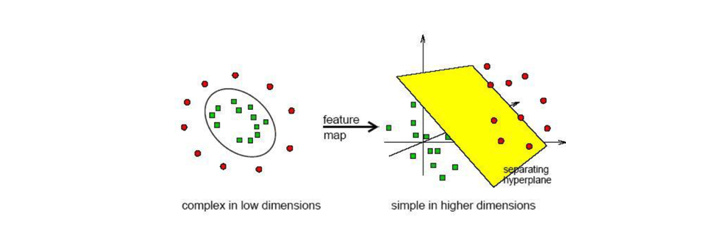

저차원(2차원)에서는 선형 분리가 되지 않을 수 있지만, 고차원(3차원)에서는 선형 분리가 가능할 수 있습니다.<br>
이러한 원리를 바탕으로 선형 분리가 불가능한 저차원 데이터를 선형 분리가 가능한 어떤 고차원으로 보내 선형 분리를 할 수 있습니다.<br>
하지만, 저차원 데이터를 고차원으로 보내서 서포트 벡터를 구하고 저차원으로 내리는 과정에서 더 복잡해지고 연산량도 많아질것이 분명합니다. <br>
그래서 여기에서 Kernel Trick이라는 Mapping 함수를 사용합니다. Kernel Trick은 고차원 Mapping과 고차원에서의 내적 연산을 한번에 할 수 있는 방법입니다. <br>
이를 통해 여러가지 Kernel 함수를 통해 저차원에서 해결하지 못한 선형 분리를 고차원에서 해결할 수 있습니다.<br>

대표적인 Kernel 함수
- Linear (선형 함수) : 선형 또는 초편명
- Poly   (다항식 함수) : 다항식으로 고차원에서 꾸불꾸불하게 되어있음
- RBF    (방사기저 함수) : 가우스분포를 사용하는것인데 성능이 좋음
- Hyper-Tangent (쌍곡선 탄젠트 함수) : 사이킷런에서 sigmoid 이름으로 되어있음
- 다른 모든 커널함수를 다써봐야 함
-  폴리는 연산량이 많아 오래걸림
서포트 벡터 머신 분류기는 Sklearn의 svm 패키지에 있습니다.



#### 1) 모델 불러오기 및 정의하기

In [ ]:
from sklearn.svm import 

#### 2) 모델 학습하기 (훈련 데이터)

In [ ]:
svc.fit( )

#### 3) 결과 예측하기 (테스트 데이터)

In [ ]:
y_pred =  

#### 4) 결과 살펴보기
일반적으로 분류에서는 Accuracy, 정확도를 평가 척도로 사용합니다.<br>

In [ ]:
print('서포트 벡터 머신, 정확도 : {:.2f}%'.format( )
 

### Decision Tree : 특정기준으로 자르는것 불순도나 엔트로피로 자름
이전의 회귀 수업에서 결정 트리에 대해 간단하게 살펴보았었습니다.<br>
결정 트리는 입력 변수를 특정한 기준으로 잘라(분기) 트리 형태의 구조로 분류를 하는 모델입니다.<br>

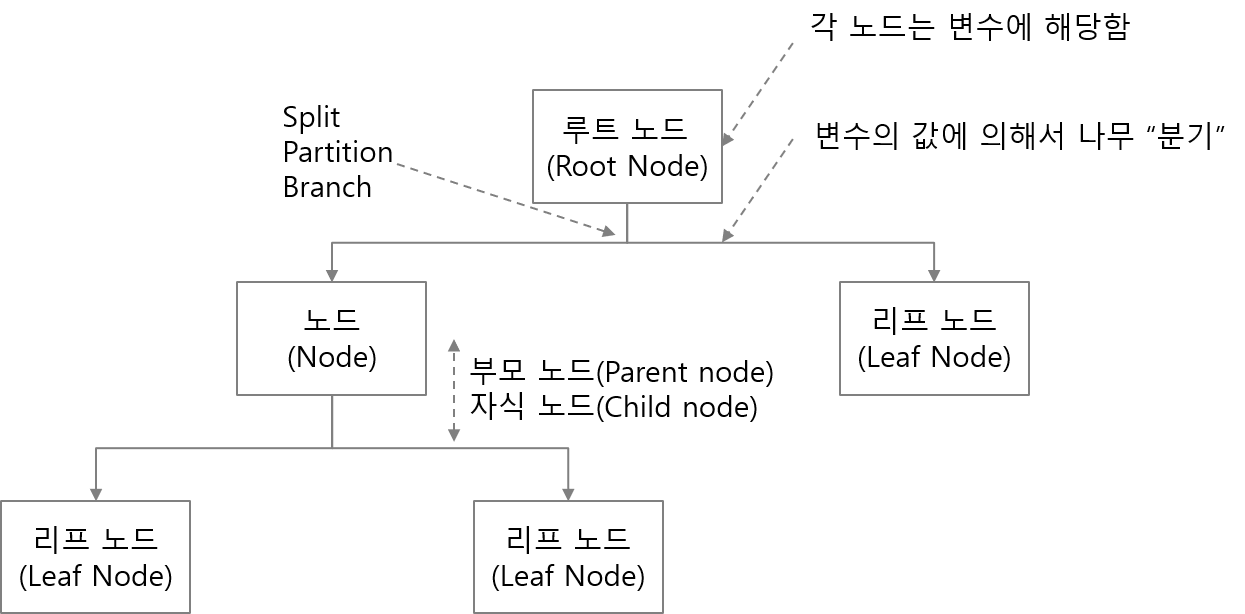
<br>

* 사람의 논리적 사고 방식을 모사하는 분류 방법론 : 예 발사이즈로 남자 여자구분? 사람이 생각하기에 쪼갠 사람의 생각을 모사하는 방법??
* IF-THEN rule의 조합으로 class 분류 : 신발이 크냐? 물어보는거
* 결과를 나무 모양으로 그릴 수 있음
* Greedy 한 알고리즘 (한번 분기하면 이후에 최적의 트리 형태가 발견되더라도 되돌리지 않음, 최적의 트리 생성을 보장하지 않음) 트리가 분석이 빠른이유
* 축에 직교하는 분기점 : 기준에서 선을 긋는다 그러면 직교하게됨
* 데이터 전처리가 필요 없음 : 데이터를 기준으로 자르기때문에 값으로자르기 때문에 전처리를 안해줘도 큰 문제가 없음 라벨인코딩이나 원핫인코딩해도 크게 상관없음

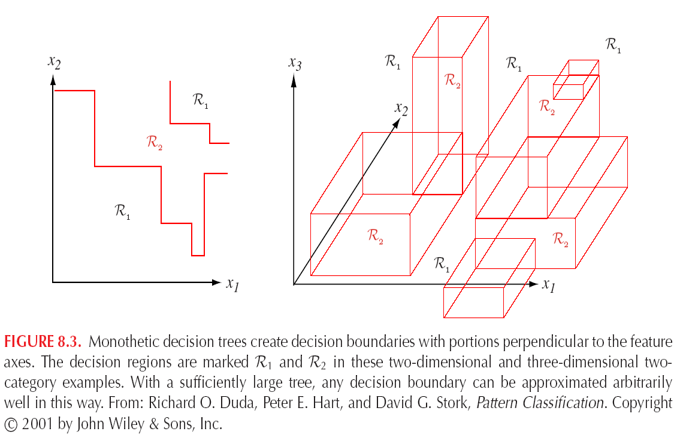 

#### 불순도(Impurity, Entropy)
결정 트리는 데이터의 불순도를 최소화 할 수 있는 방향으로 트리를 분기합니다. <br>
불순도란 정보 이론(Information Theory)에서 말하는 얻을 수 있는 정보량이 많은 정도를 뜻합니다. <br>
ex) 오늘 해가 동쪽에서 뜰꺼야 -> 낮은 정보량, 오늘 일식이 일어날꺼야 -> 높은 정보량 <br>
정보 이론의 정보량의 자세한 내용은 참조 목록에 링크로 남겨두겠습니다. 확인해보시면 좋겠습니다.

결정 트리 모델은 Sklearn의 tree 패키지에 있습니다.

#### 1) 모델 불러오기 및 정의하기

In [ ]:
from sklearn.tree import  

#### 2) 모델 학습하기 (훈련 데이터)

In [ ]:
dt.fit()

#### 3) 결과 예측하기 (테스트 데이터)

In [ ]:
y_pred =  

#### 4) 결과 살펴보기
일반적으로 분류에서는 Accuracy, 정확도를 평가 척도로 사용합니다.<br>

In [ ]:
print('결정 트리, 정확도 : {:.2f}%'.format( ))

#### Feature Importance
트리 기반 모델은 트리를 분기하는 과정에서 어떤 변수가 모델을 생성하는데 중요한지에 대한 변수 중요도를 살펴볼 수 있습니다.

In [ ]:
feature_importance = 
feature_importance

### Random Forest
결정 트리가 나무였다면, 랜덤 포레스트는 숲 입니다. 랜덤 포레스트의 특징은 작은 트리들을 여러개 만들어 합치는 모델입니다.<br>
서로 다른 변수 셋으로 여러 트리를 생성합니다. 여러개의 모델을 합치는 앙상블 기법 중 대표적인 예시입니다.

#### 위의 예제와 같이 Random Forest 모델을 사용해보세요.(5분)
랜덤 포레스트 모델은 Sklearn의 ensemble 패키지에 있습니다.

In [ ]:
# 수강생 ver
from sklearn.ensemble import  



print('랜덤 포레스트, 정확도 : {:.2f}%'.format( )
 


In [ ]:
rf.score( ) 
 

#부스팅 앙상블 모델 학습 파일

## Evaluation 
### 1. Accuracy, 정확도
모든 데이터에 대해 클래스 라벨을 얼마나 잘 맞췄는지를 계산 

 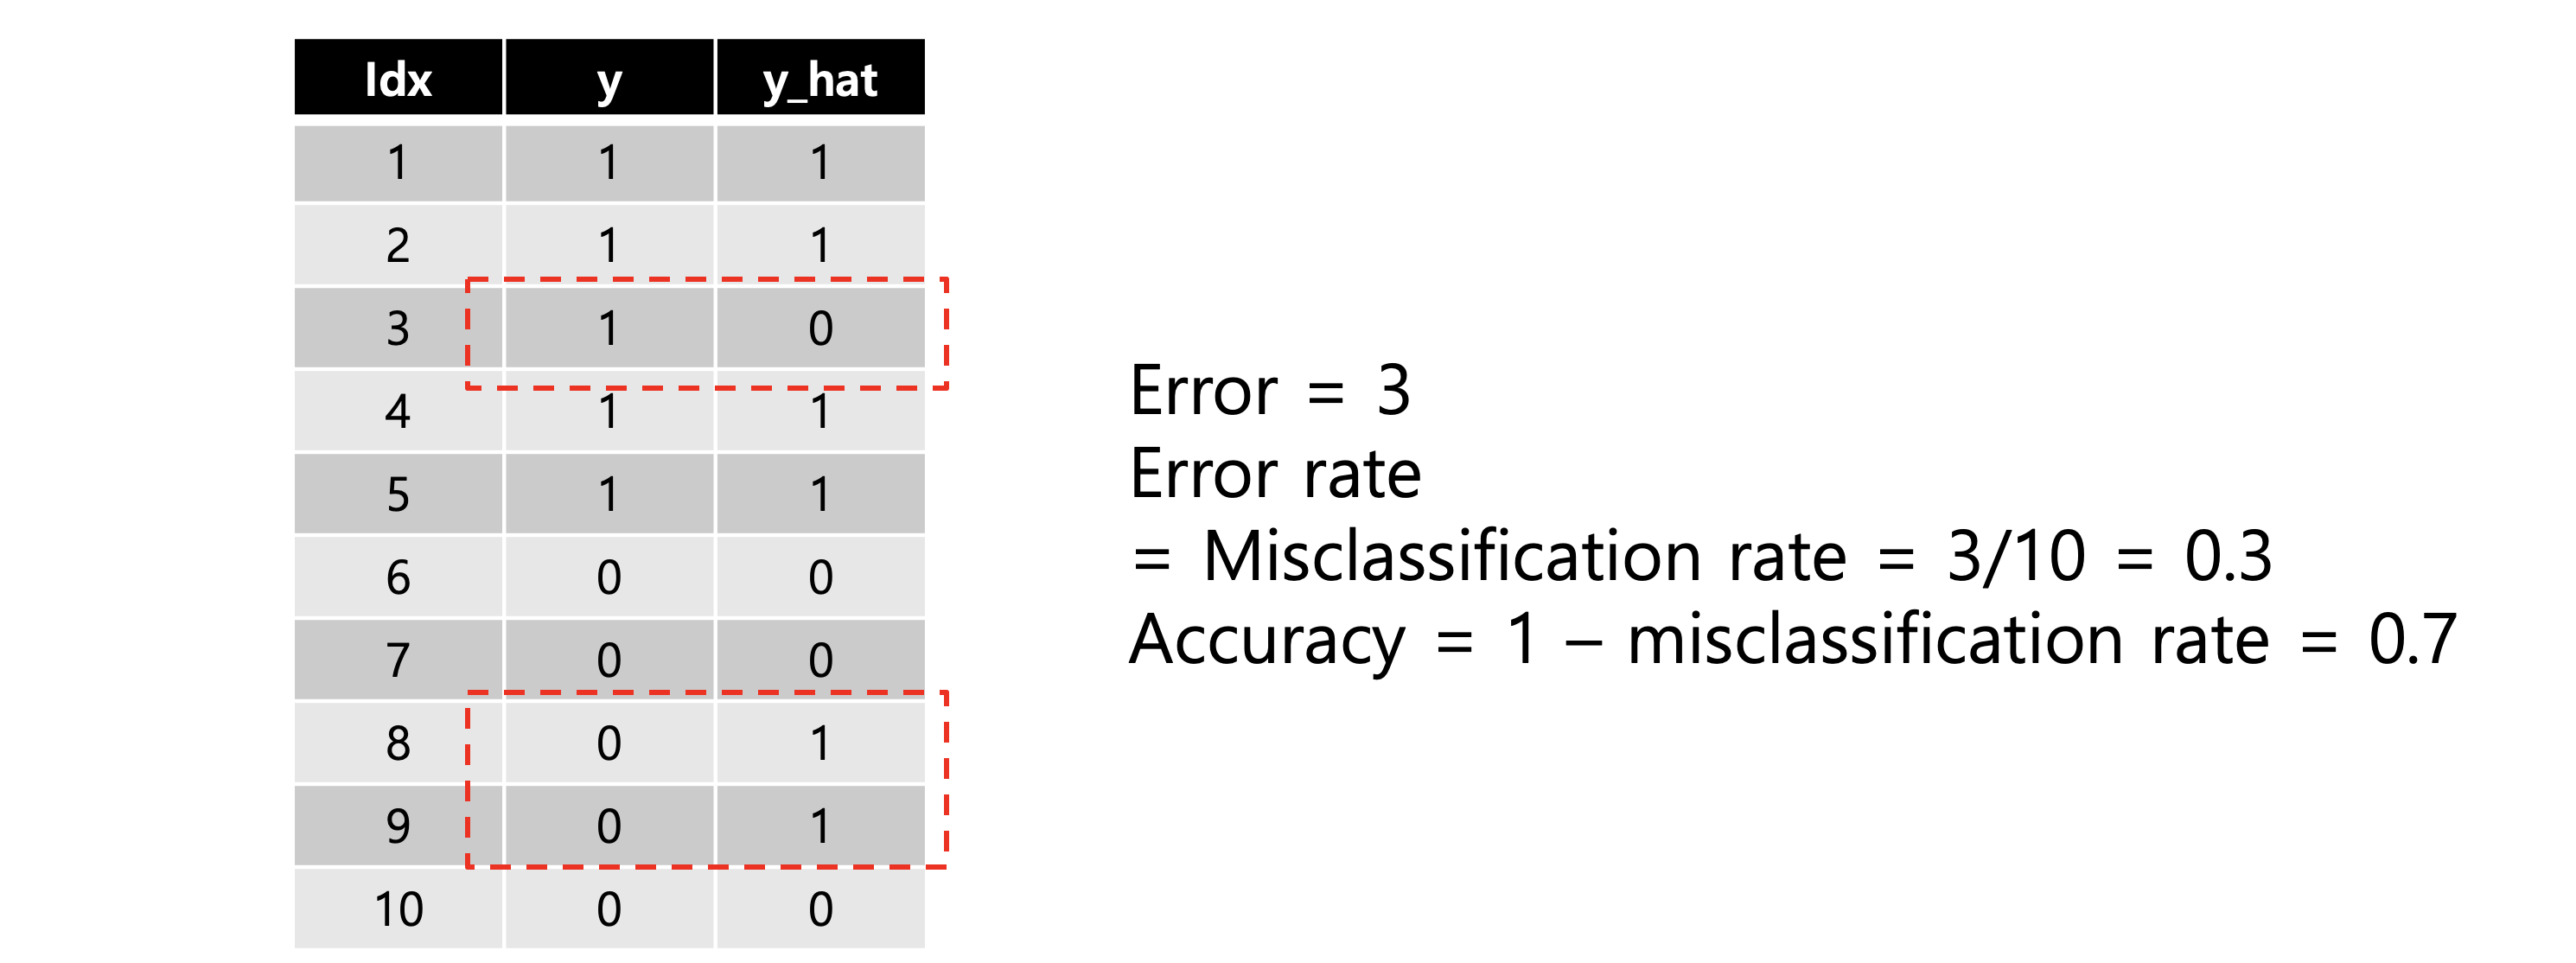

### 2. Confusion Matrix, 혼동 행렬
정확도로는 분류 모델의 평가가 충분하지 않을 수 있습니다. 예를 들어, 병이 있는 사람을 병이 없다고 판단하는 경우 Risk가 높기 때문에 모델의 목적에 맞게 분류 모델을 평가하여야 합니다. 이때 사용되는 것이 Confusion Matrix 입니다. 

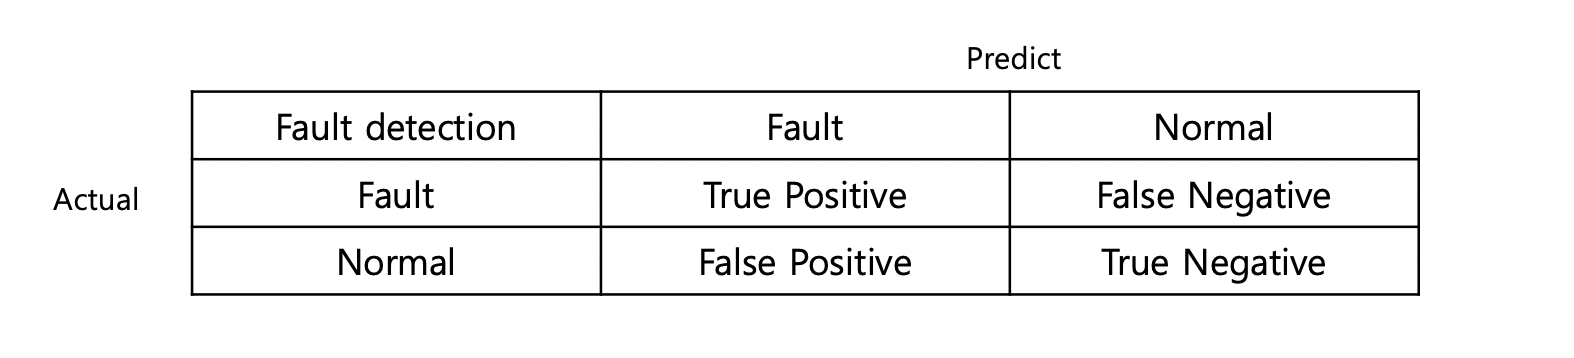

* Precision, 정밀도  : TP/(FP+TP), 1이라고 예측한 것 중 실제로 1인 것 : 정밀도가 높다해도 민감도 특이도를 잘 봐야함
* Sensitivity, 민감도 : True Positive rate = Recall = Hit ratio = TP/(TP+FN), 실제로 1인 것 중에 1이라고 예측한 것 : 의료데이터에서 중요함
* Specificity, 특이도 : True Negative rate = TN/(FP+TN), 실제로 0인 것 중에 0이라고 예측한 것 
* False Alarm, 오탐 : False Positive rate = 1-Specificity = FP/(FP+TN), 실제로 0인 것 중에 1이라고 예측한 것
* 두개를 고려한 F1 스코어도 있음 설명해주면 좋을듯

### 3. ROC Curve, AUC
ROC Curve(Receiver-Operating Characteristic curve)는 민감도와 특이도가 서로 어떤 관계를 가지며 변하는지를 2차원 평면상에 표현한 것 입니다.<br>
ROC Curve가 그려지는 곡선을 의미하고, AUC(Area Under Curve)는 ROC Curve의 면적을 뜻합니다.<br>
AUC 값이 1에 가까울 수록 좋은 모델을 의미합니다. 
* 쓰레드홀드 값을 변경할때 값이 변동됨 민감도와 특이도가 흔들리는데  0.5 이상으로 그래프로 이쁘게 그려지게됨 1에 가까울 수록 좋음

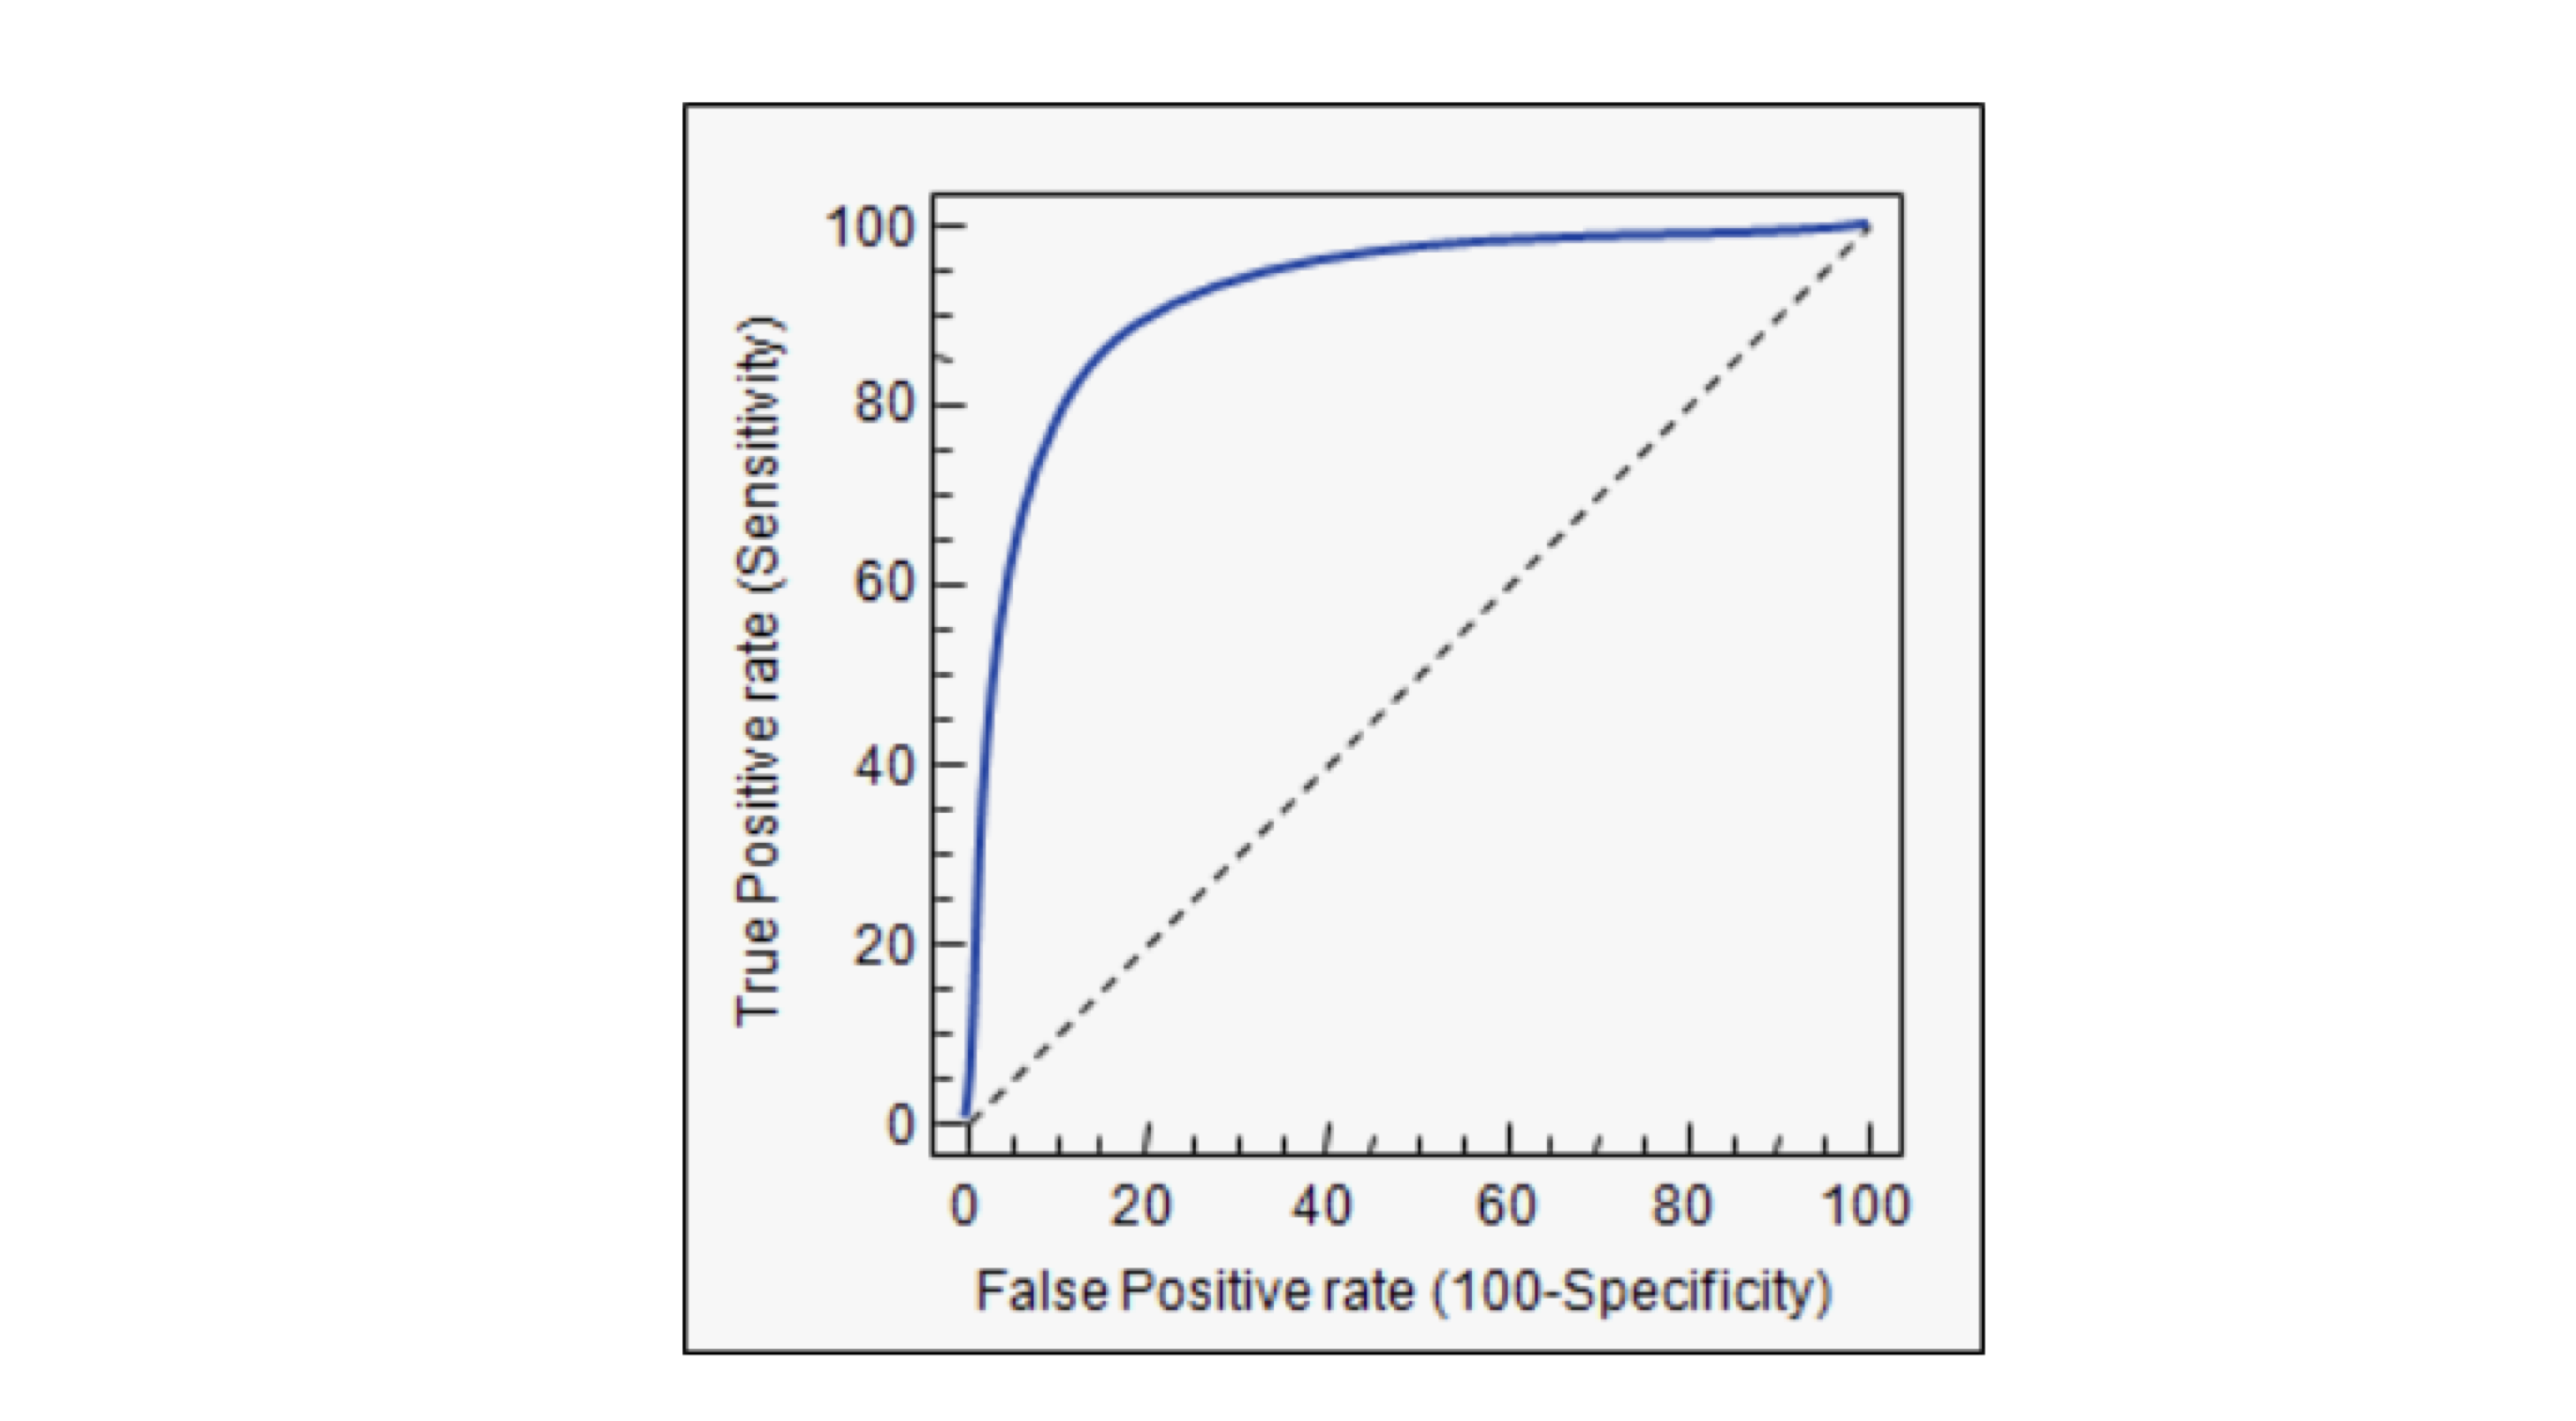

#### 정확도, 정밀도, 민감도, AUC Score
여러 스코어링 함수를 실습해 보기 위해 전복 데이터를 가져오겠습니다.<br>
그리고 정밀도, 민감도, AUC Score는 이진 분류인 경우에 사용할 수 있으므로, 수컷, 암컷 데이터만 학습하여 예측한 점수를 계산해 보겠습니다.

In [ ]:
from sklearn.metrics import  

In [ ]:
abalone_path = 
column_path =  

abalone_columns = list()
for l in open():

    

In [ ]:
data =  

* train test분류


In [ ]:
from sklearn.ensemble import  

In [ ]:
print('Accuracy : {:.3f}'.format( )
print('Precision : {:.3f}'.format( )
print('Recall : {:.3f}'.format( )
print('AUC : {:.3f}'.format( )

Accuracy : 0.539
Precision : 0.500
Recall : 0.202
AUC : 0.515


### Reference
- Wikipedia, Classification : https://en.wikipedia.org/wiki/Statistical_classification
- Maximum Likelihood Estimation, 최대 우도 추정 : https://ratsgo.github.io/statistics/2017/09/23/MLE/
- One-vs-Rest : https://datascienceschool.net/view-notebook/7a6b958e9d51451689138cca93a047d8/
- Information Theory 설명 : https://ratsgo.github.io/statistics/2017/09/22/information/
- ROC AUC 설명 : https://adnoctum.tistory.com/121
- Sklearn, iris dataset : http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
- Sklearn, Logistic Regression : https://www.google.com/url?q=http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html&sa=U&ved=0ahUKEwibhIa0-uDhAhVPeXAKHfPhCYQQFggEMAA&client=internal-uds-cse&cx=016639176250731907682:tjtqbvtvij0&usg=AOvVaw2AirAop04TUH9X2S1r9FVd
- Sklearn, SVM : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- Sklearn, Decision Tree : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Sklearn, Random Forest : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
#ROCAUC 링크를 잘 보자